# Attempt to obtain fluctuations from direct signal by integrating each period (what the referee suggested)

In [1]:
import numpy as np
import scipy.signal
from datetime import datetime
from scipy.optimize import minimize
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from config import get_from_config
shift_03_09_2020 = path_assistant.PathAssistant('shift_03_09_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
waveforms_dir = shift_03_09_2020.get_waveforms_dir()
results_dir = shift_03_09_2020.get_results_dir()


/home/ilobach/fur


In [2]:
t1 = datetime(2020, 3, 9, 19, 8, 0)
t2 = datetime(2020, 3, 9, 19, 42, 0)

In [3]:
wf_paths = [p for p in shift_03_09_2020.get_waveform_paths() if
            (t1 < shift_03_09_2020.get_datetime(os.path.basename(p)) < t2)]
n_files = len(wf_paths)

In [4]:
n_files

44

In [5]:
from fur.fluctuations_individual_periods import analyze_one_file_one_channel

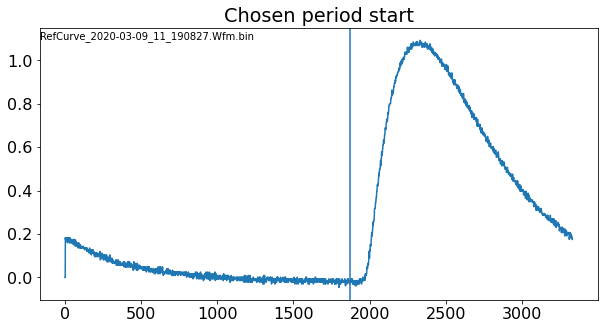

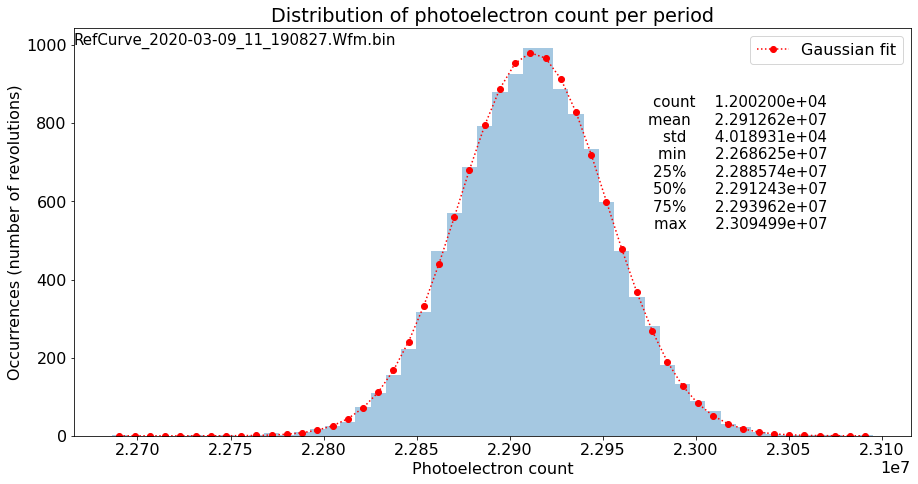

count    1.200200e+04
mean     2.291262e+07
std      4.018931e+04
min      2.268625e+07
25%      2.288574e+07
50%      2.291243e+07
75%      2.293962e+07
max      2.309499e+07
Name: n_photoelectrons, dtype: float64

In [6]:
desc = analyze_one_file_one_channel(wf_paths[0], show_plot=True, show_chosen_period_start=True)
desc

In [7]:
indiv_fluct_df = pd.DataFrame(columns=['file_path','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], index=range(n_files))

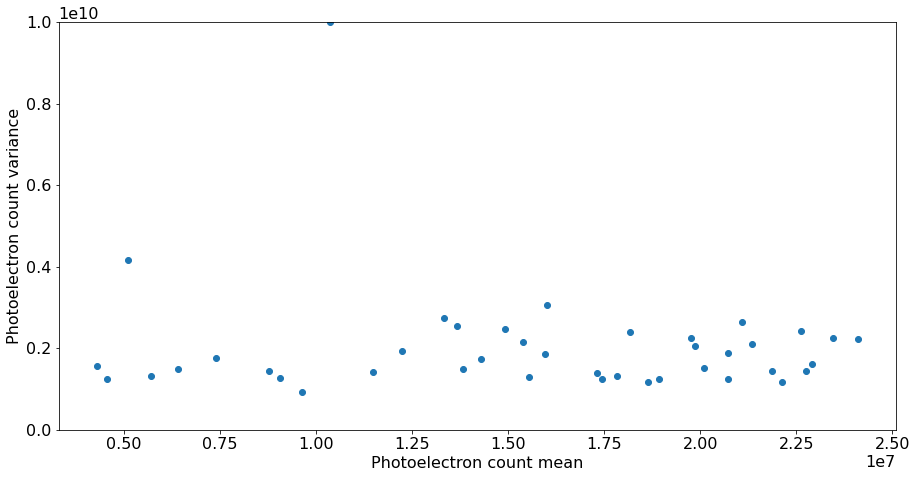

In [20]:
fig, ax = plt.subplots()
ax.plot(indiv_fluct_df['mean'], indiv_fluct_df['std']**2, 'o')
ax.set_ylim(0,1e10)
ax.set_ylabel("Photoelectron count variance")
ax.set_xlabel("Photoelectron count mean")
plt.show()

In [17]:
# indiv_fluct_df.to_csv(results_dir.fi("indiv_fluct_df_directly_connected_FLAT_03_09_2020.csv"))

In [19]:
indiv_fluct_df = pd.read_csv(results_dir.fi("indiv_fluct_df_directly_connected_FLAT_03_09_2020.csv"))

Started working on  1/44


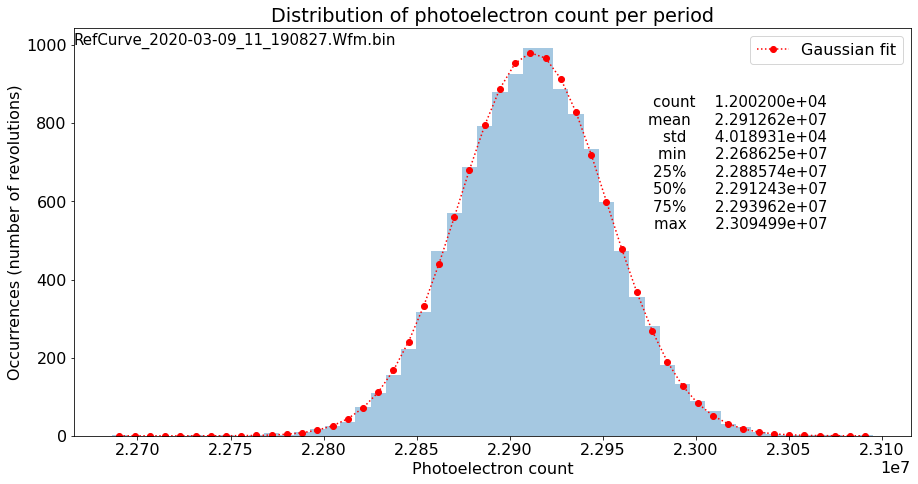

Finished working on  1/44
Started working on  2/44


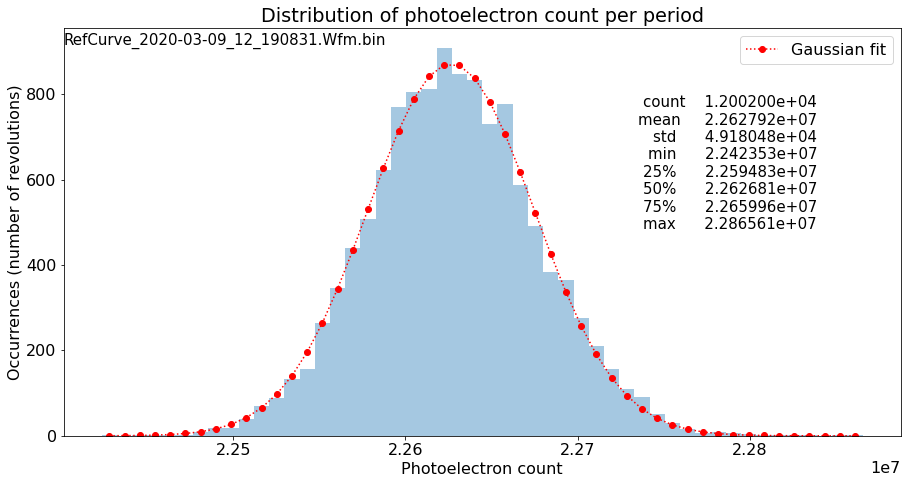

Finished working on  2/44
Started working on  3/44


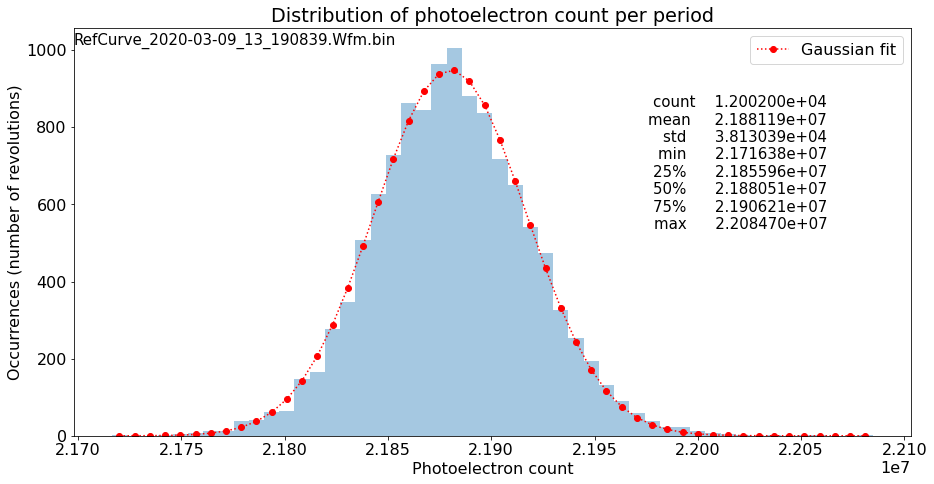

Finished working on  3/44
Started working on  4/44


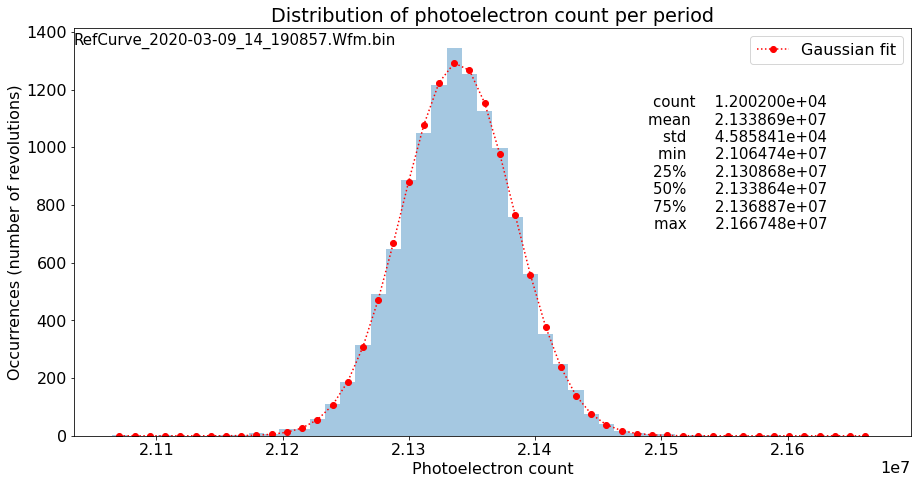

Finished working on  4/44
Started working on  5/44


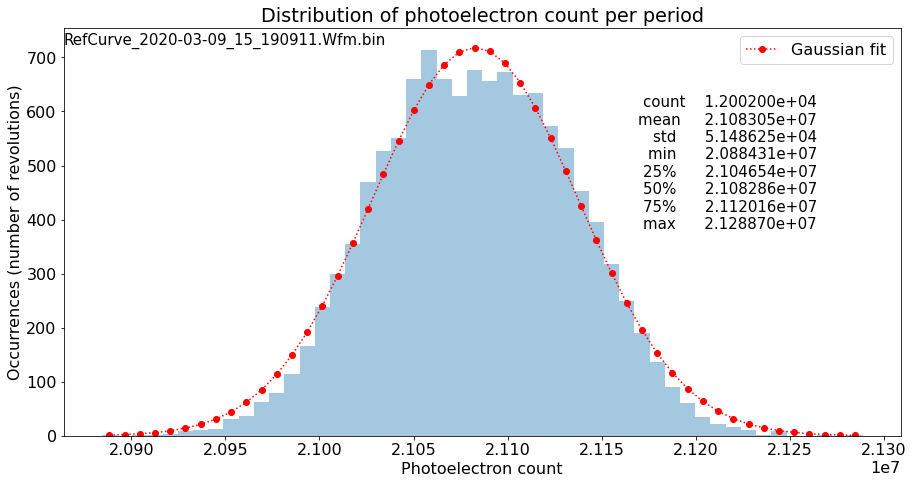

Finished working on  5/44
Started working on  6/44


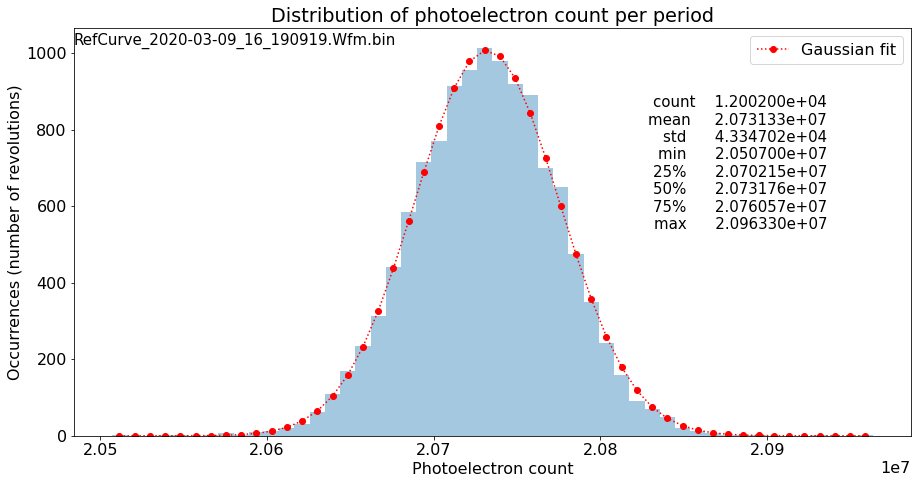

Finished working on  6/44
Started working on  7/44


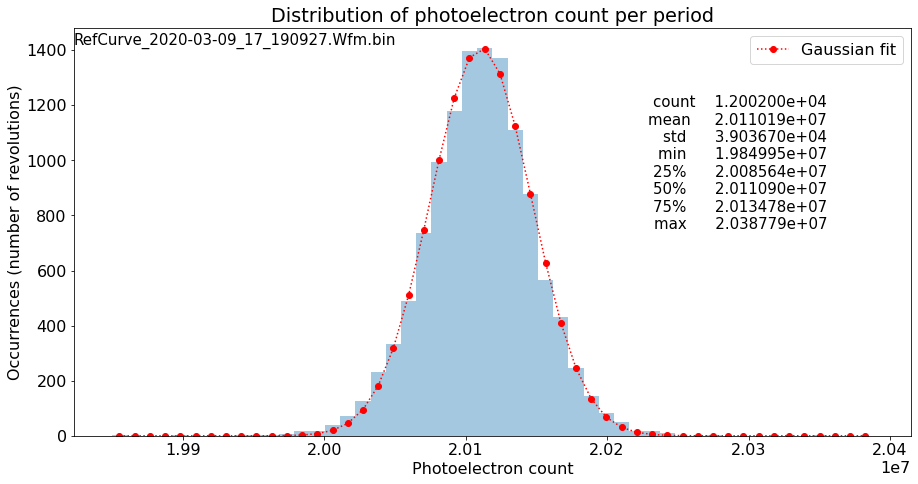

Finished working on  7/44
Started working on  8/44


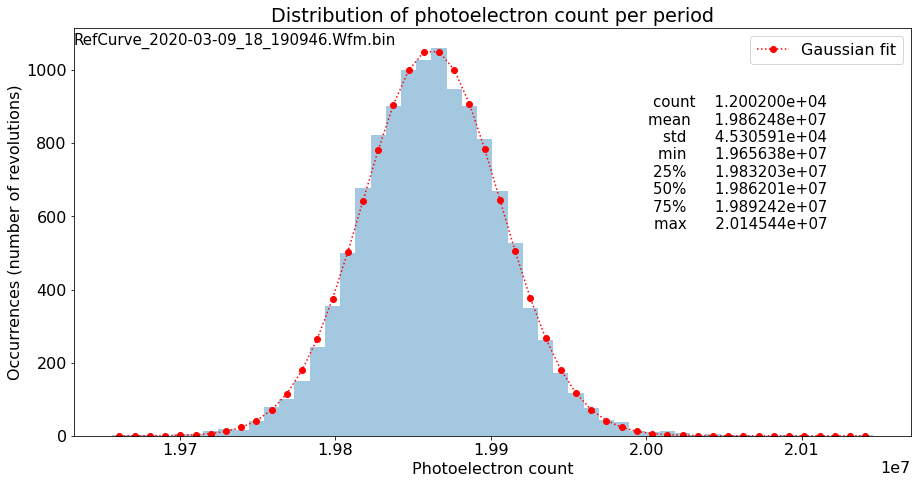

Finished working on  8/44
Started working on  9/44


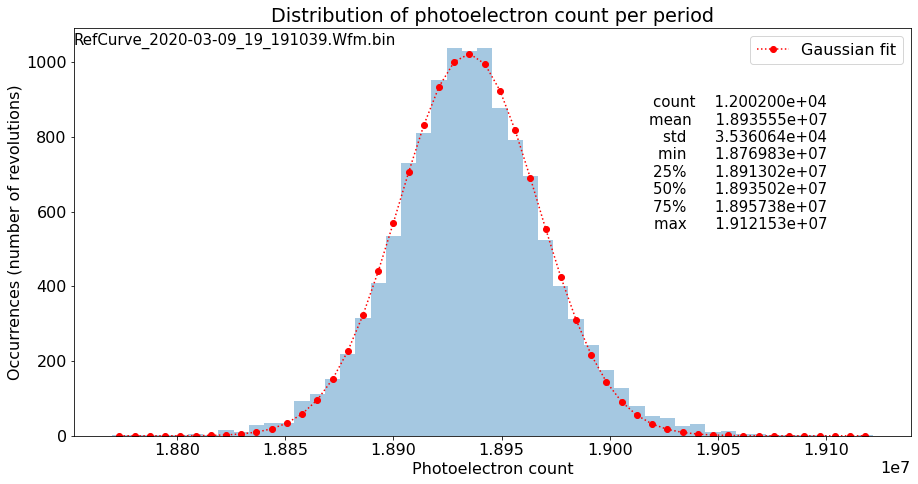

Finished working on  9/44
Started working on  10/44


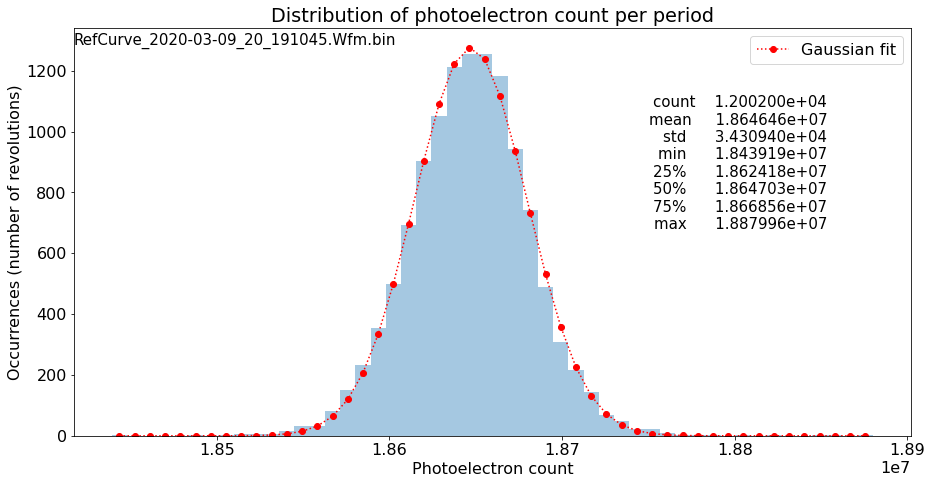

Finished working on  10/44
Started working on  11/44


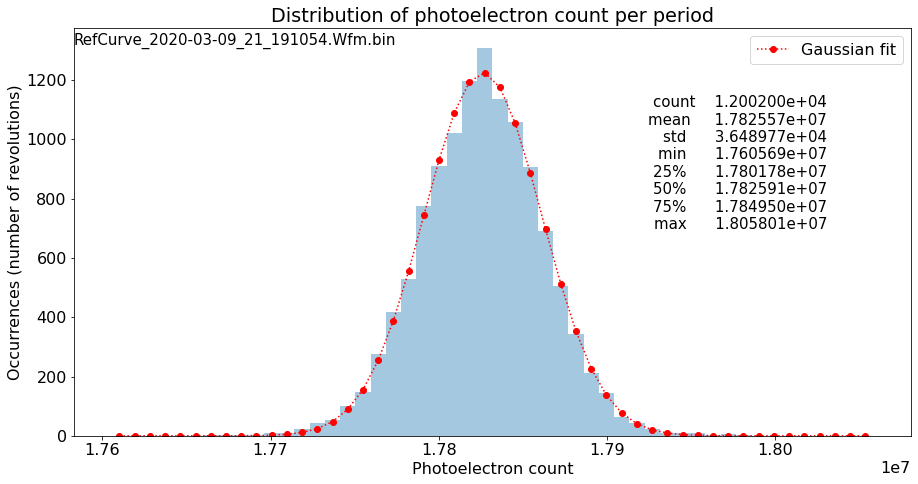

Finished working on  11/44
Started working on  12/44


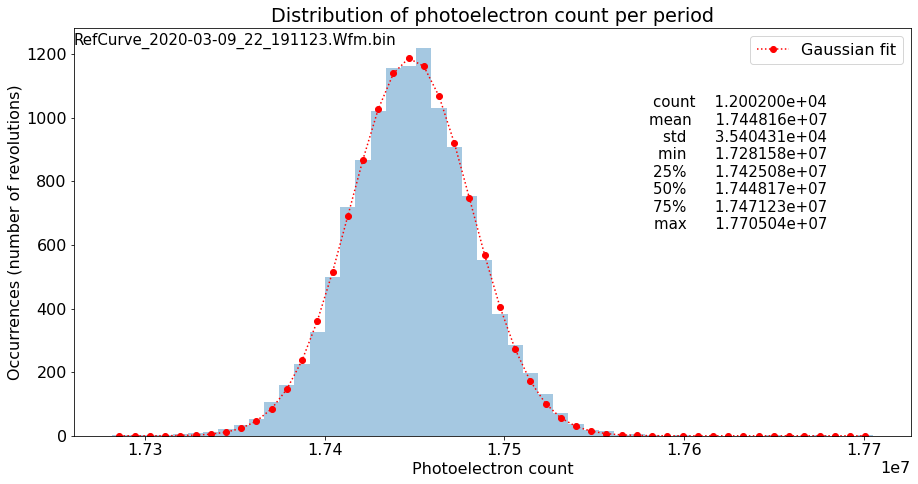

Finished working on  12/44
Started working on  13/44


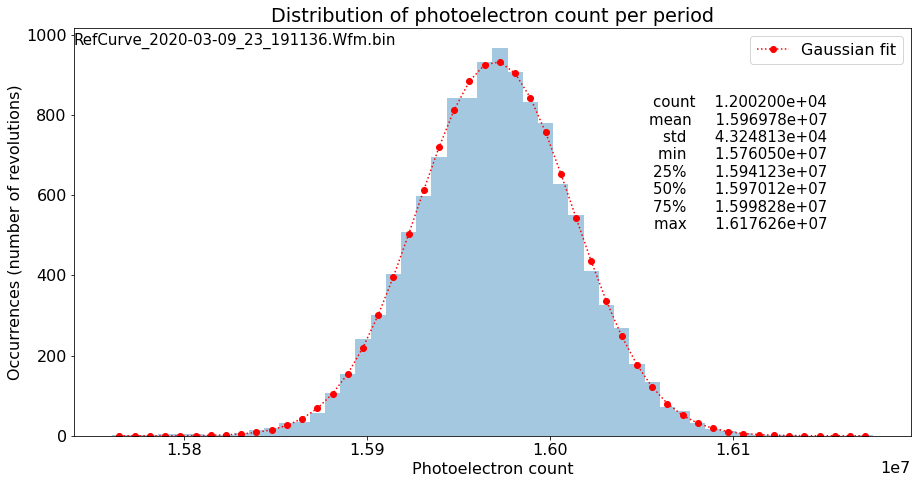

Finished working on  13/44
Started working on  14/44


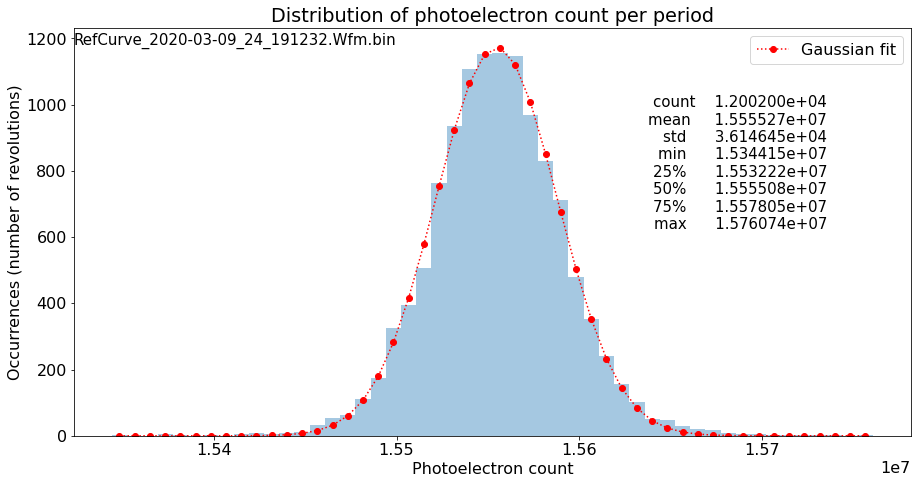

Finished working on  14/44
Started working on  15/44


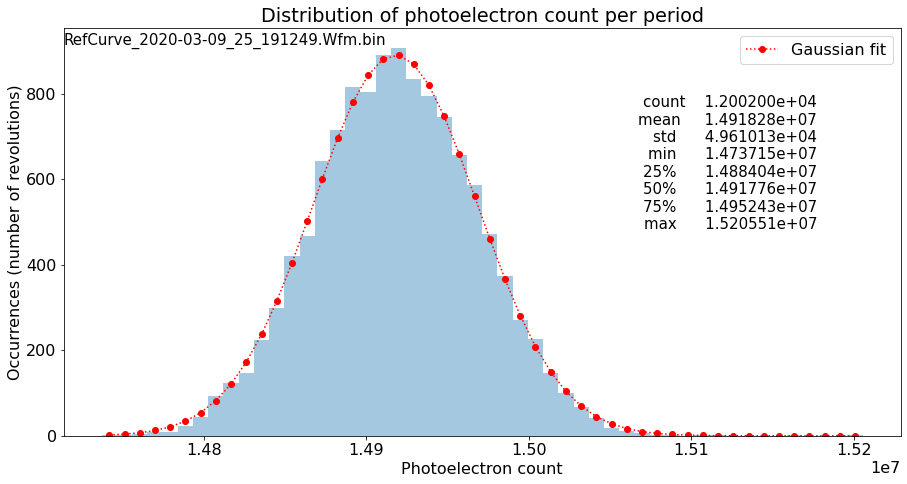

Finished working on  15/44
Started working on  16/44


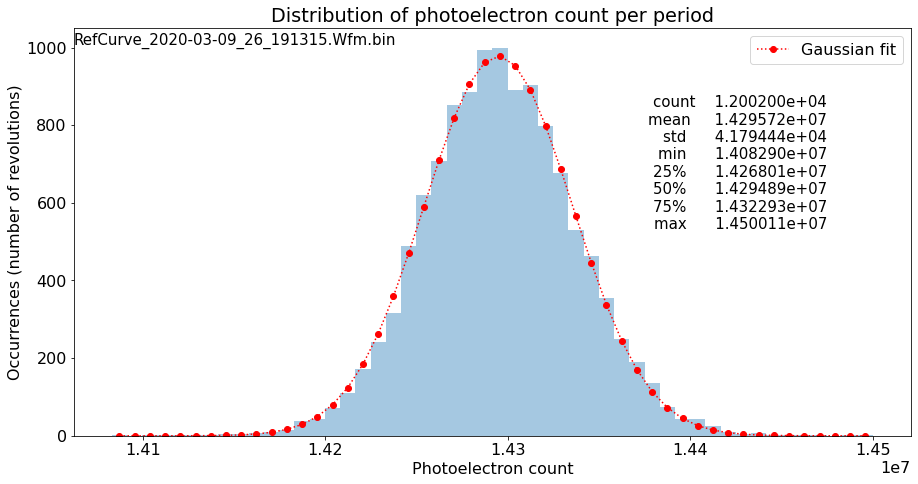

Finished working on  16/44
Started working on  17/44


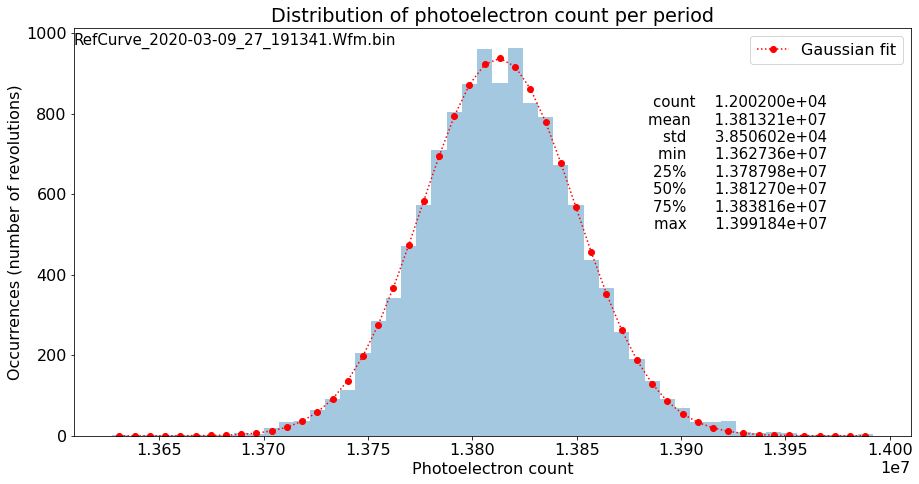

Finished working on  17/44
Started working on  18/44


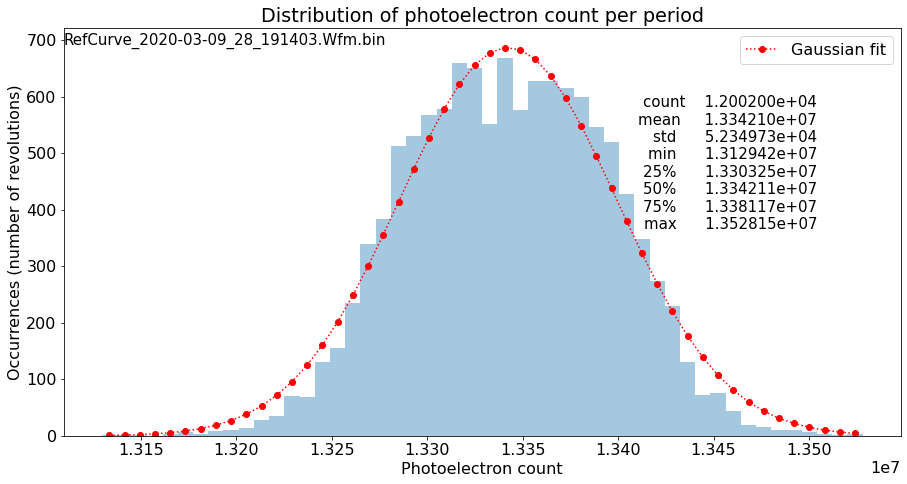

Finished working on  18/44
Started working on  19/44
Exception happened while trying to fitthe distribution with a Gaussian:  Optimal parameters not found: Number of calls to function has reached maxfev = 800.


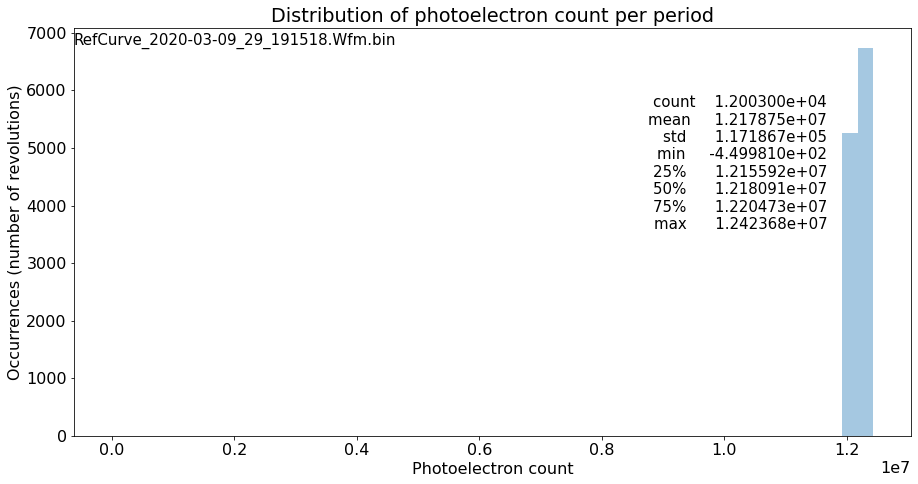

Finished working on  19/44
Started working on  20/44


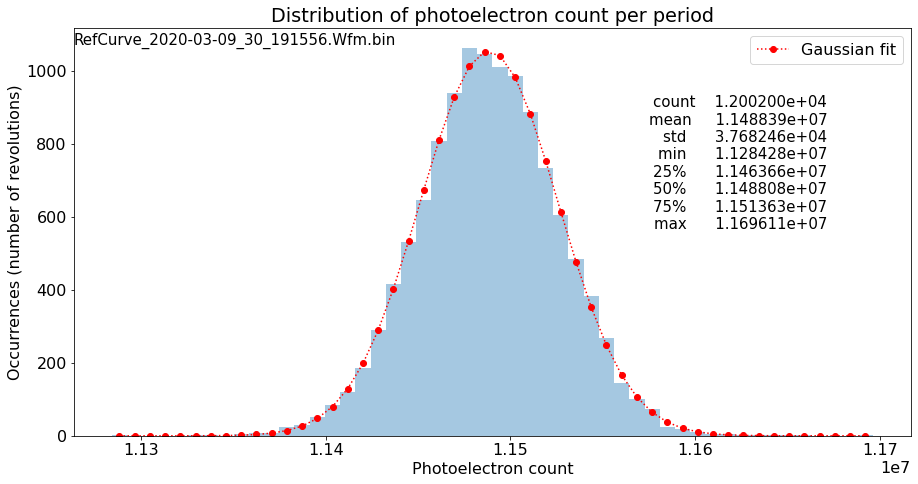

Finished working on  20/44
Started working on  21/44
Exception happened while trying to fitthe distribution with a Gaussian:  Optimal parameters not found: Number of calls to function has reached maxfev = 800.


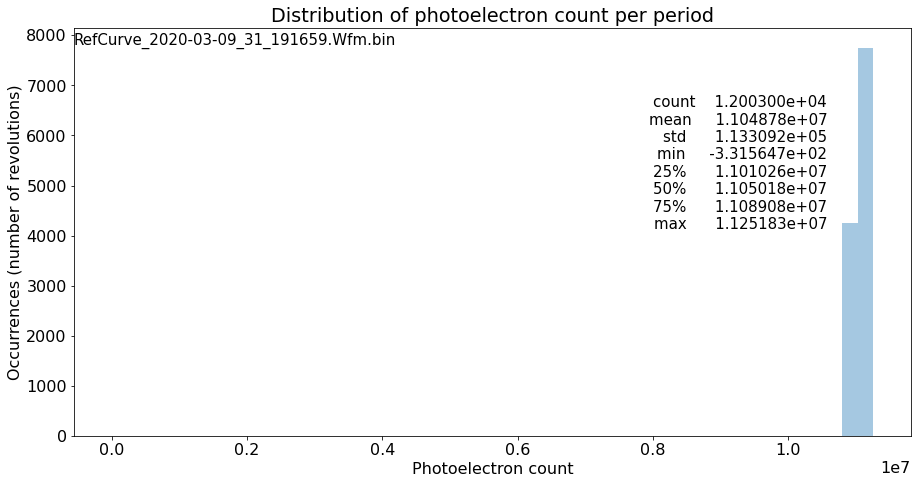

Finished working on  21/44
Started working on  22/44
Exception happened while trying to fitthe distribution with a Gaussian:  Optimal parameters not found: Number of calls to function has reached maxfev = 800.


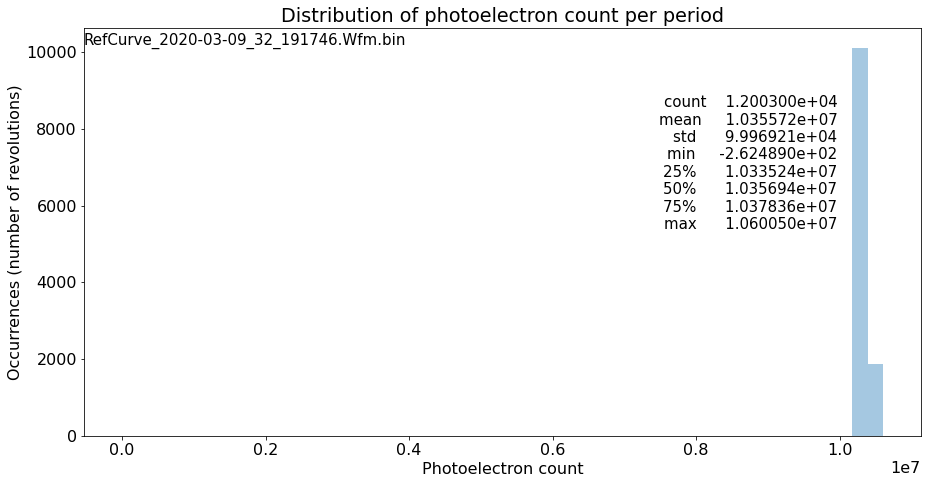

Finished working on  22/44
Started working on  23/44


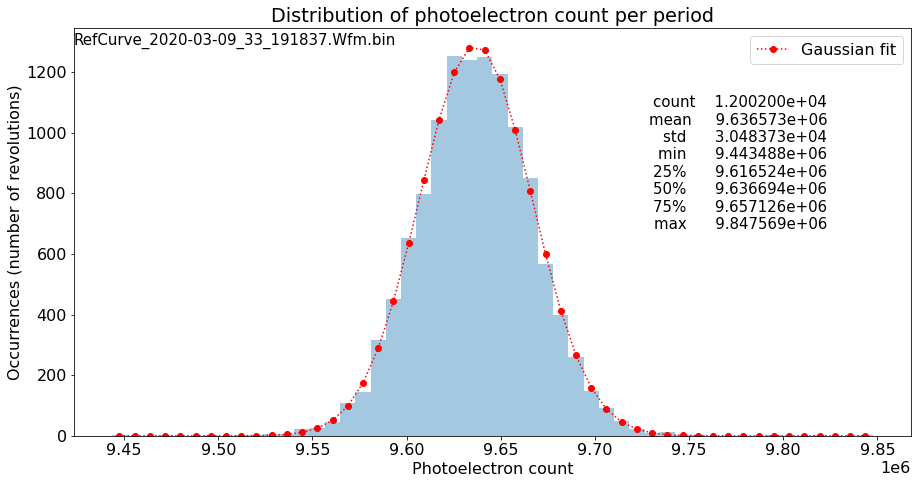

Finished working on  23/44
Started working on  24/44


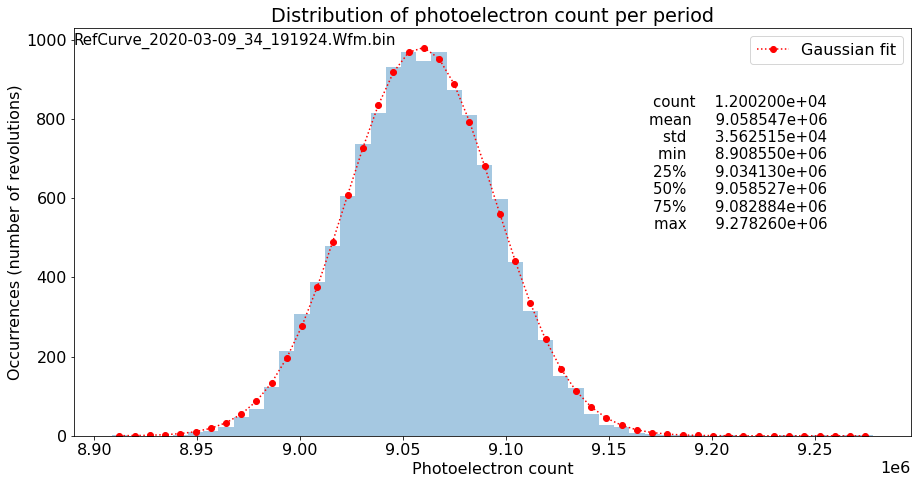

Finished working on  24/44
Started working on  25/44


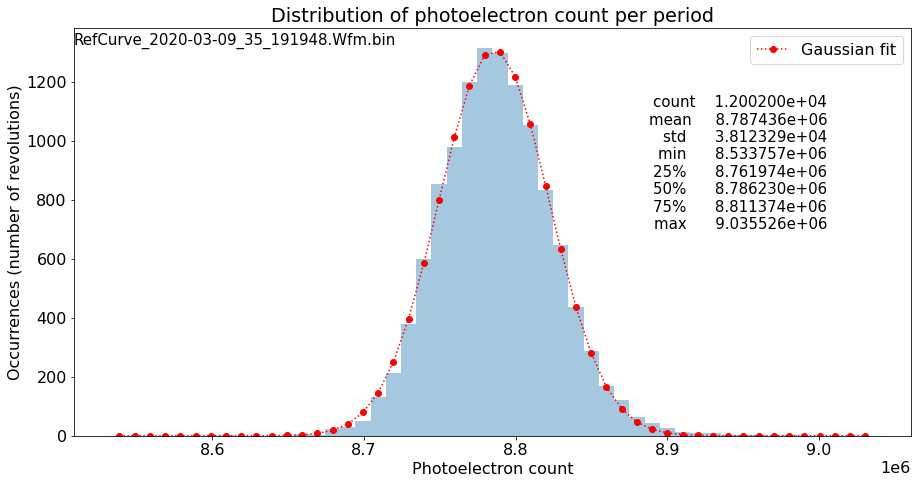

Finished working on  25/44
Started working on  26/44


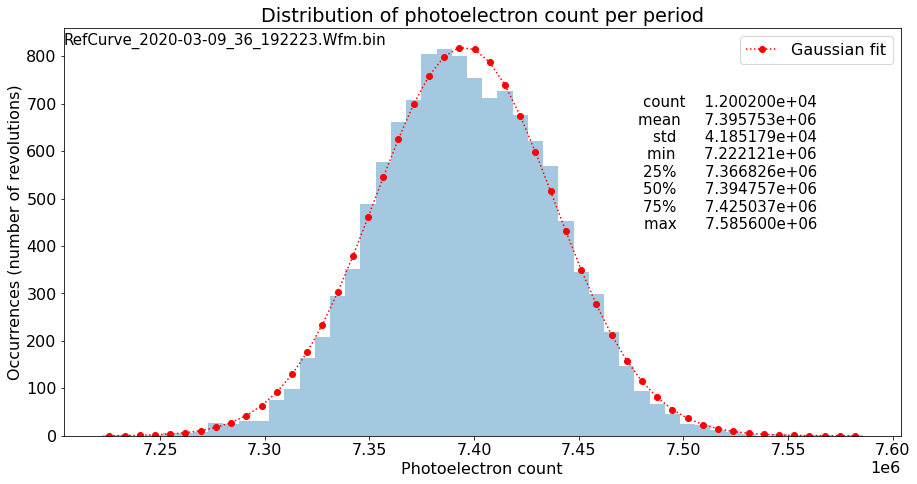

Finished working on  26/44
Started working on  27/44


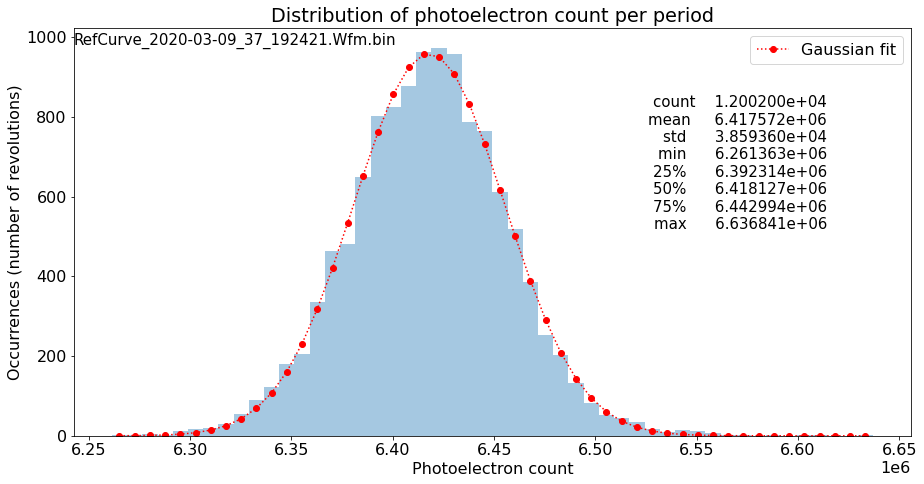

Finished working on  27/44
Started working on  28/44


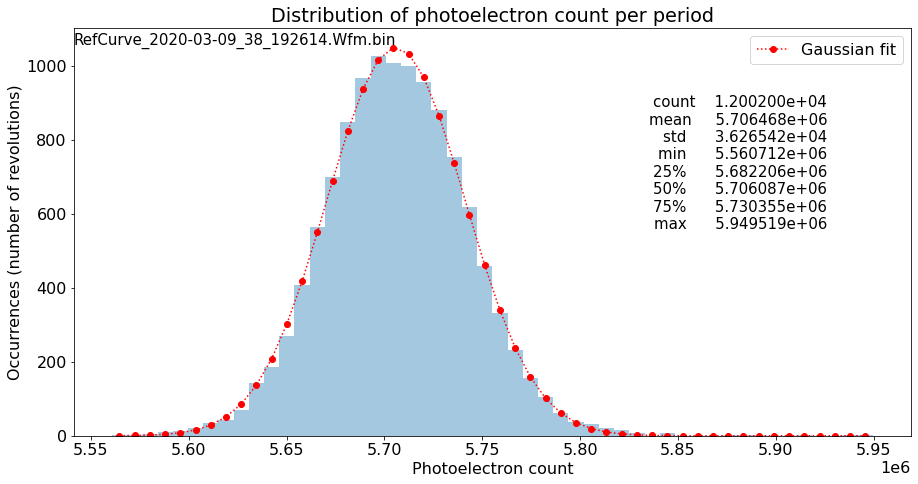

Finished working on  28/44
Started working on  29/44


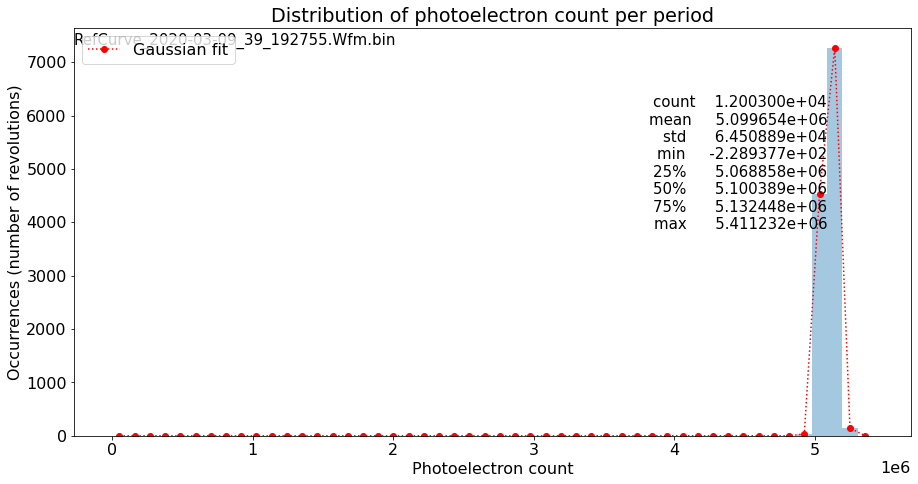

Finished working on  29/44
Started working on  30/44


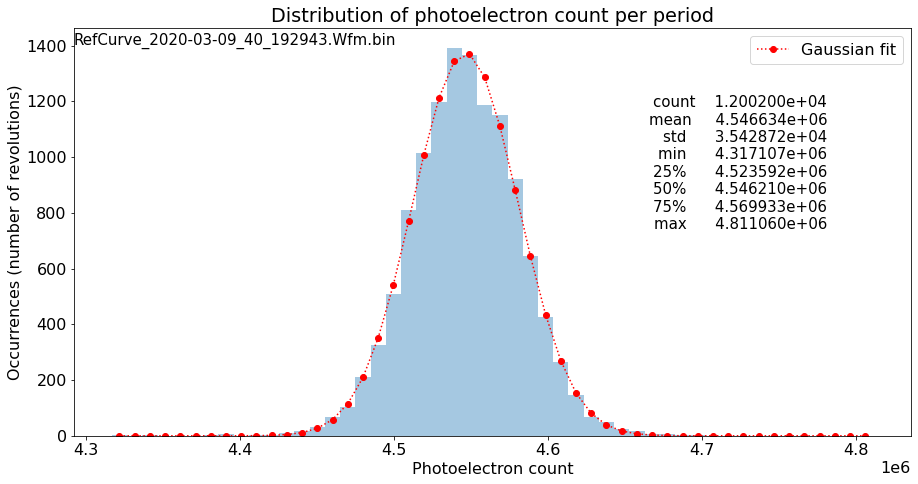

Finished working on  30/44
Started working on  31/44


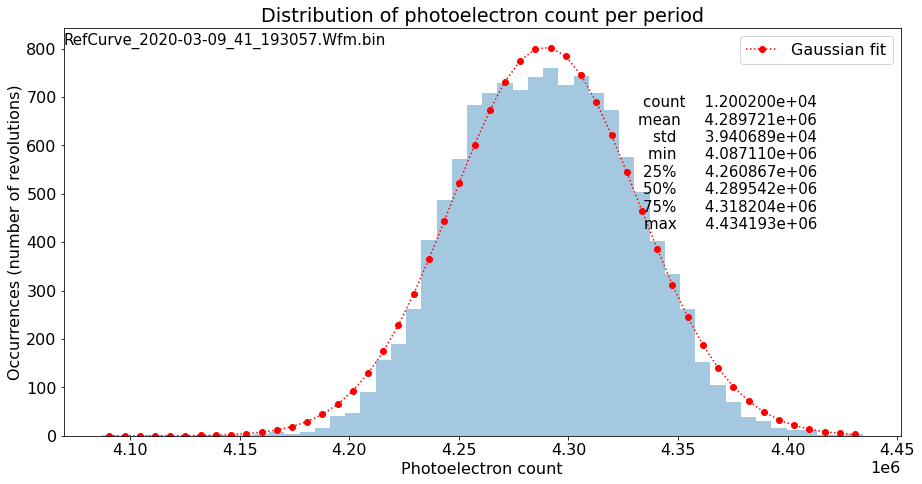

Finished working on  31/44
Started working on  32/44


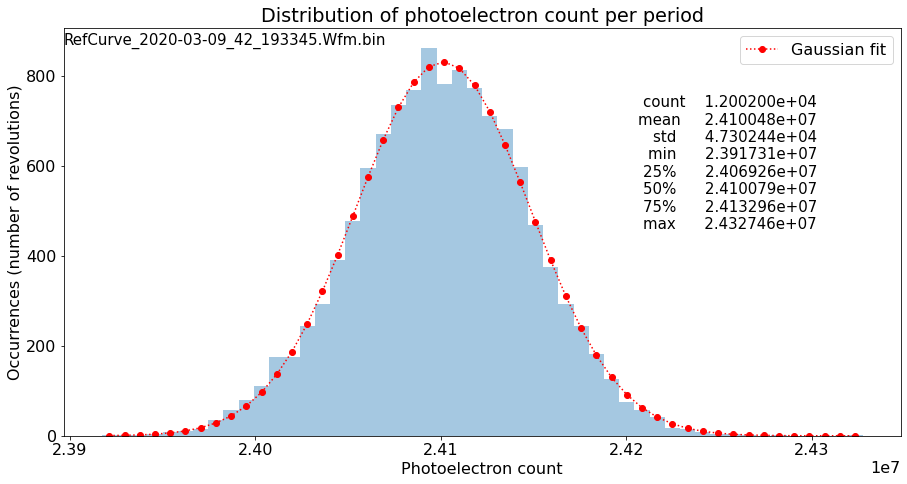

Finished working on  32/44
Started working on  33/44


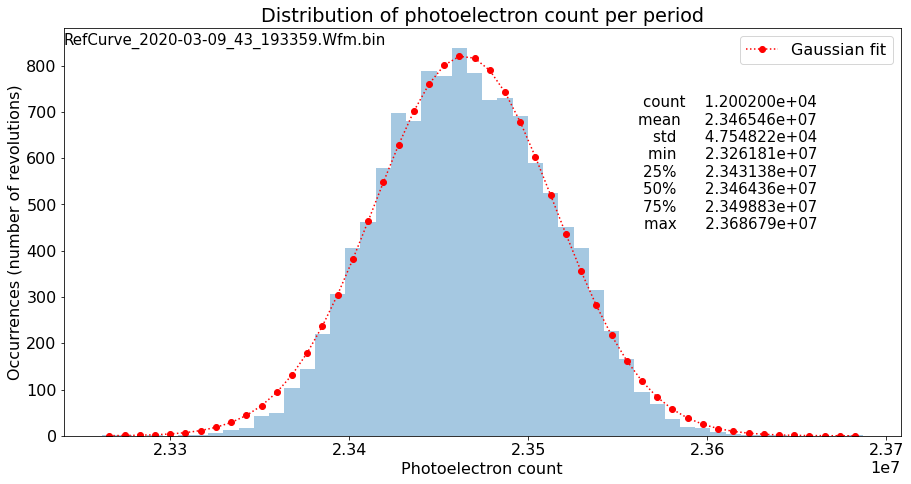

Finished working on  33/44
Started working on  34/44


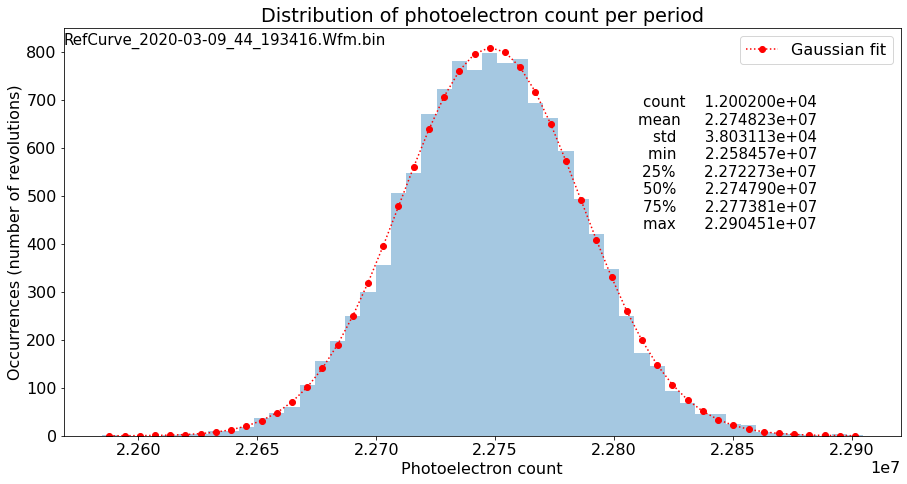

Finished working on  34/44
Started working on  35/44


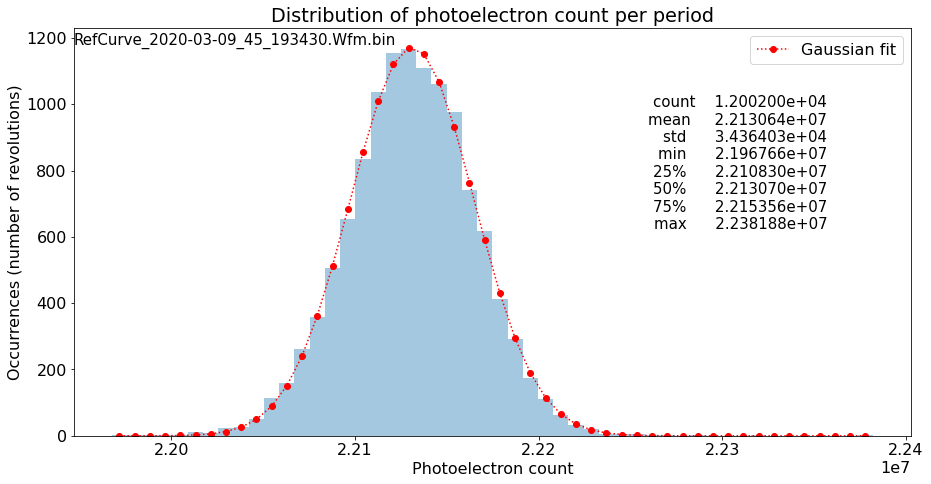

Finished working on  35/44
Started working on  36/44
Exception happened while trying to fitthe distribution with a Gaussian:  Optimal parameters not found: Number of calls to function has reached maxfev = 800.


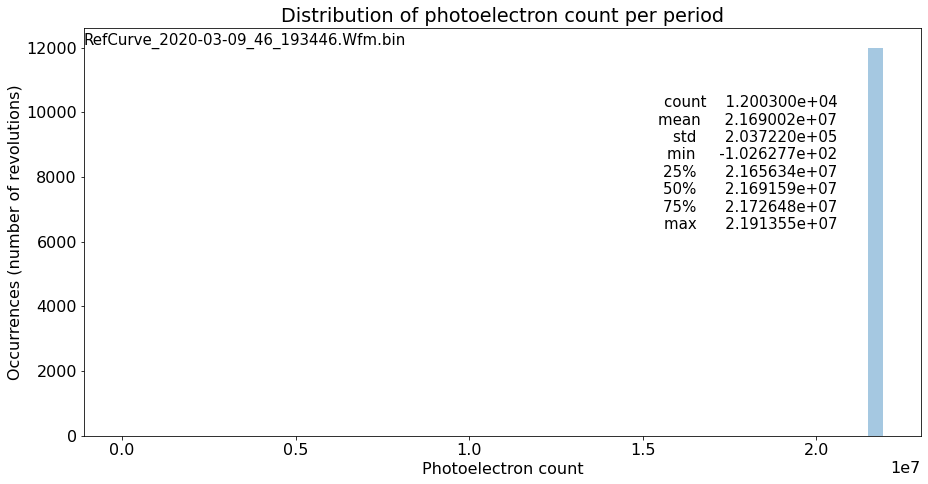

Finished working on  36/44
Started working on  37/44


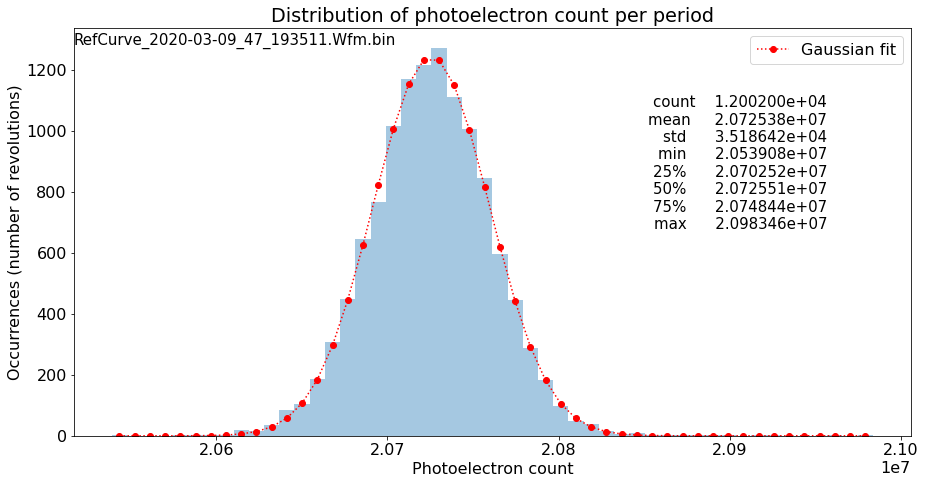

Finished working on  37/44
Started working on  38/44


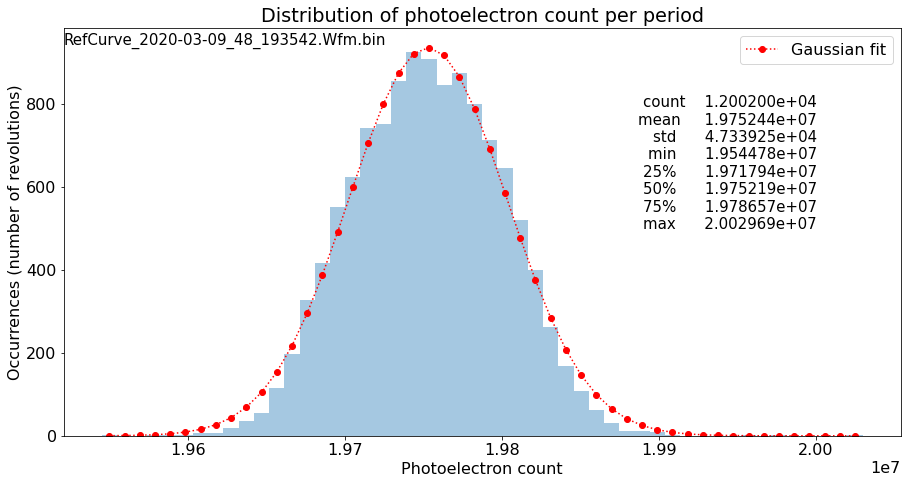

Finished working on  38/44
Started working on  39/44


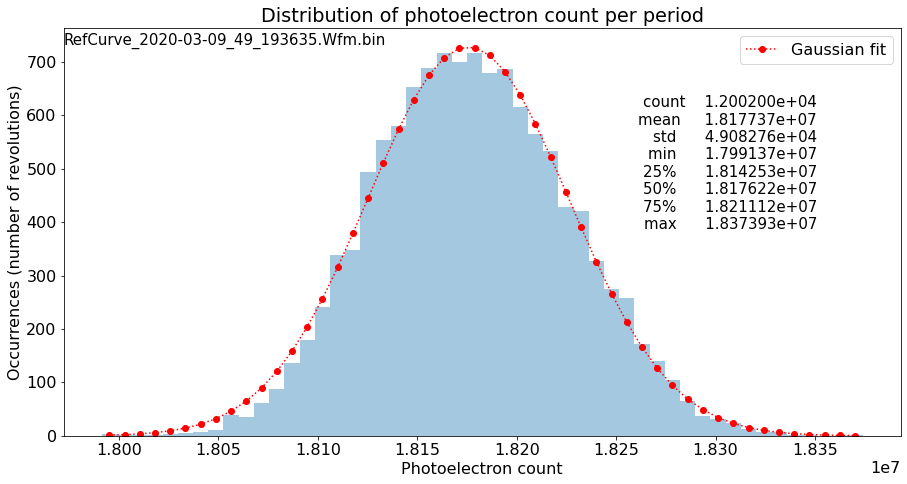

Finished working on  39/44
Started working on  40/44


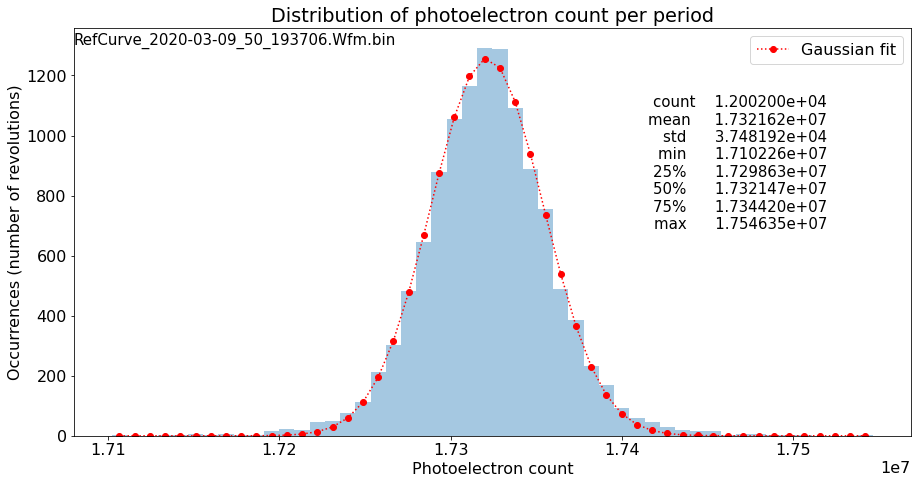

Finished working on  40/44
Started working on  41/44


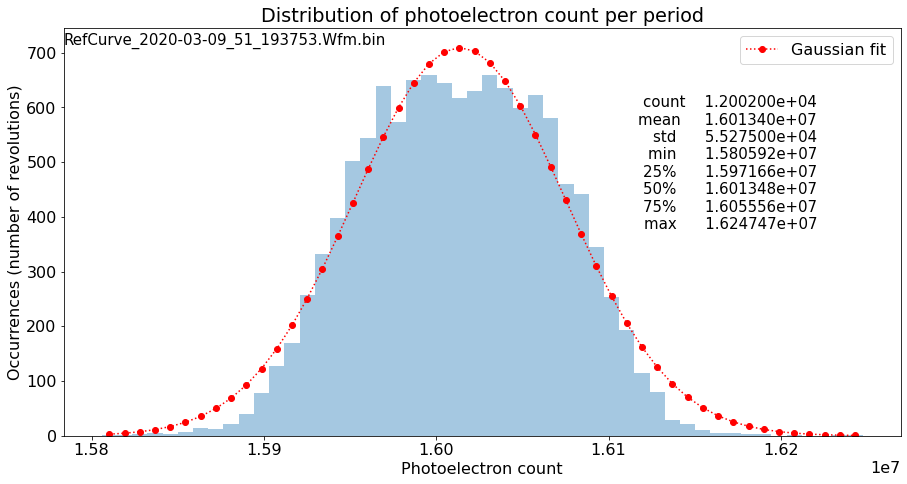

Finished working on  41/44
Started working on  42/44


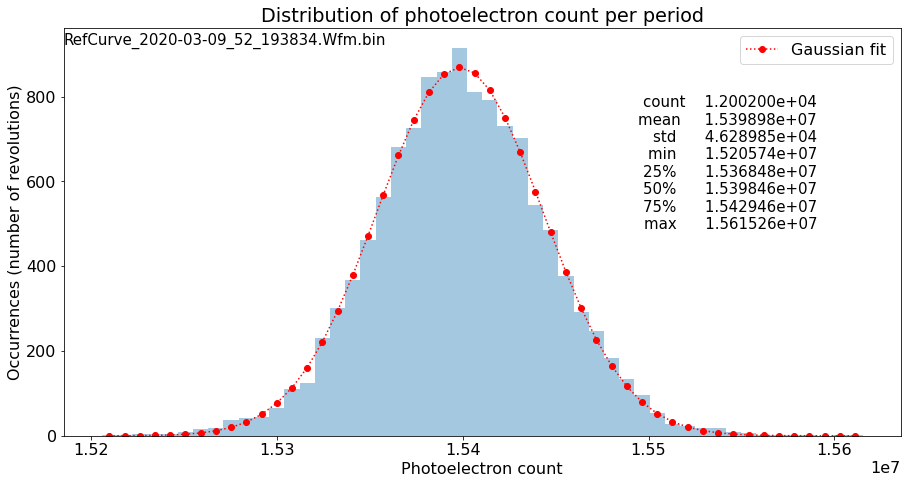

Finished working on  42/44
Started working on  43/44


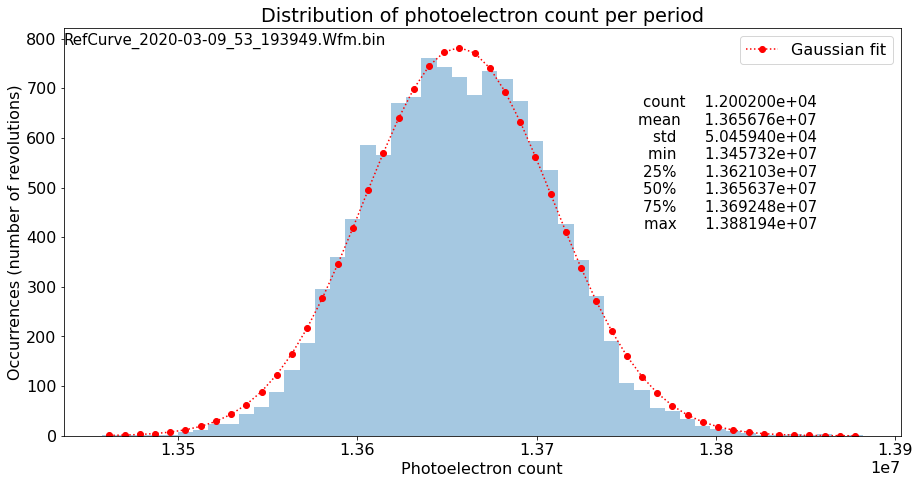

Finished working on  43/44
Started working on  44/44


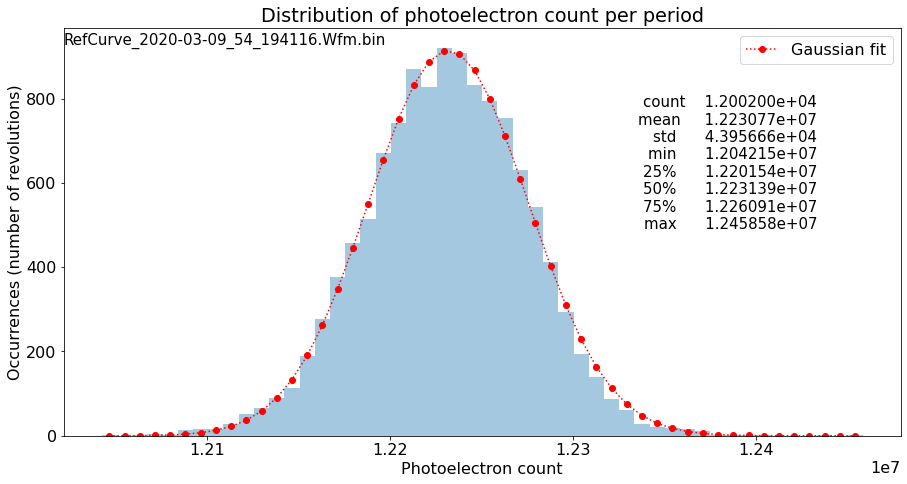

Finished working on  44/44


In [8]:
for i,p in enumerate(wf_paths):
    status = "{}/{}".format(i+1,n_files)
    print("Started working on ", status)
    desc = analyze_one_file_one_channel(p, show_plot=True)
    indiv_fluct_df.loc[i,:] = [p]+desc.tolist()
    print("Finished working on ", status)

Conclusion: the Phototoelectron count mean should be on the order of 1e7. Thus, what we see is just noise due to 8 bit scope. And the comb filter is necessary.

# Closer look at just one file:

In [21]:
idx_test = 0
res_test = indiv_fluct_df.iloc[idx_test,:]
print("Photoelectorn count variance= {:.1e}".format(res_test['std']**2))

Photoelectorn count variance= 1.6e+09


In [22]:
ch = read_waveform(res_test["file_path"], one_channel=True)
period = get_period(ch)
int_period = int(period)

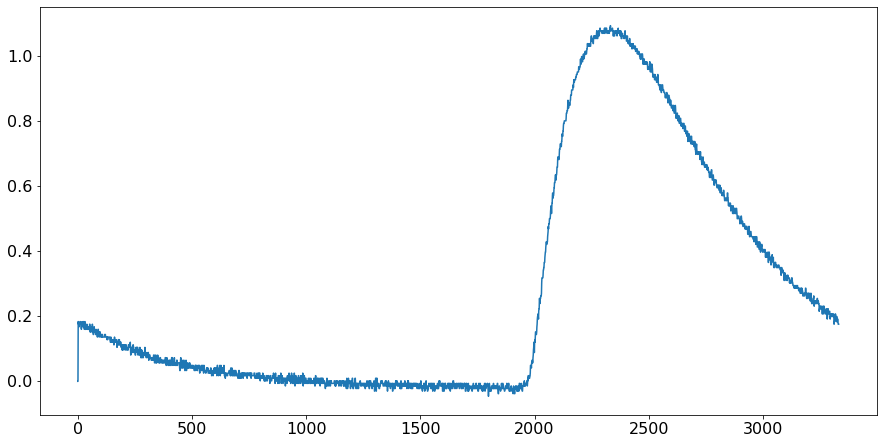

In [23]:
plt.plot(ch[:int_period])

Determening the vertical resolution due to 8 bits

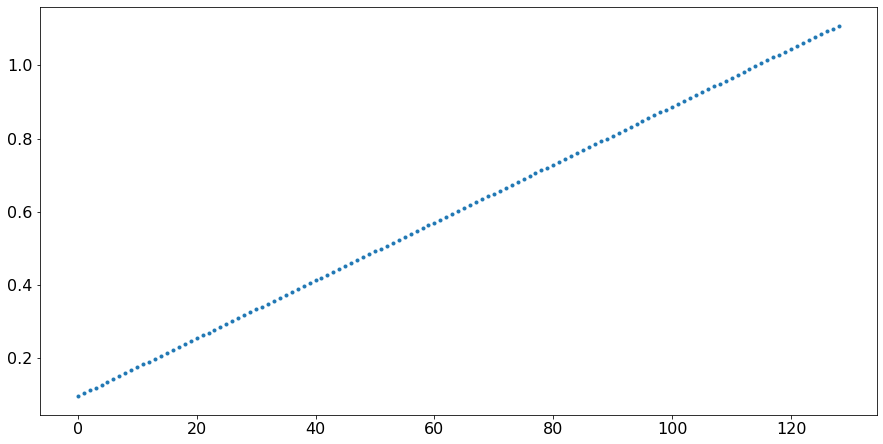

In [24]:
sorted_unique = np.sort(np.unique(ch[:100*int_period]))
sorted_len = len(sorted_unique)
cut = 20
x = range(sorted_len-cut)
y = sorted_unique[cut:]
plt.plot(x, y, '.')
plt.show()
resolution = (y[-1]-y[0])/(x[-1]-x[0])

In [25]:
print("resolution_V = ", resolution)

resolution_V =  0.007905138656497002


In [26]:
dt = get_from_config("dt")
Rf = get_from_config("Rf")
e = get_from_config("e")
print("Photoelectron count variance due to finite resolution (estimate) = {:.1e}".format((resolution*dt*1e-9/Rf/e)**2*int_period))

Photoelectron count variance due to finite resolution (estimate) = 1.3e+08


This is already more than the expected variance, so there is no way to determine physical fluctuions without the comb filter.

## The resolution noise by itself won't let reconstruct the real fluctuations. Also, looks like there is some contribution from low frequency amplifier (or some other) noise on top of it. 

In [27]:
output = {}
analyze_one_file_one_channel(res_test["file_path"], ouput_dic=output)
photoelectrons_df = output["photoelectrons_df"]

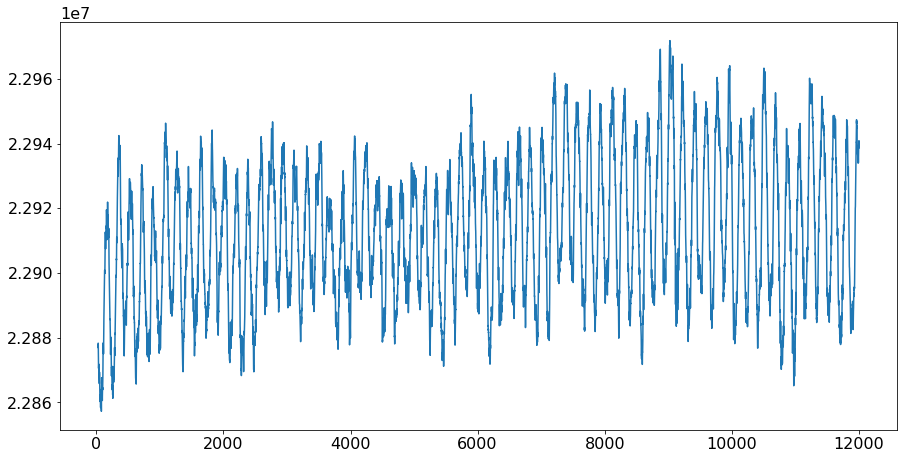

In [45]:
rolling_av = photoelectrons_df.rolling(window=30).mean()
plt.plot(rolling_av)
plt.show()

In [51]:
1/(2000/11*133)*1e9

41353.38345864662

## The plot above shows that the large value of photoelectron count variance is probably due to some harmonics in the amplifier at about 40kHz. The comb filter would remove it easily. So that's why we need it.

In [47]:
rolling_av.std()**2

n_photoelectrons    4.901761e+08
dtype: float64

In [46]:
photoelectrons_df.std()**2

n_photoelectrons    1.615181e+09
dtype: float32